In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import json
import os

Example entry at a single timestep in the JSON file:

```json
{
  "time": 0.24000000000000007,
  "ee_goal": {
    "x": 0.4,
    "y": -0.75,
    "z": 1.7,
    "roll": 1.518399507018242,
    "pitch": 0.04763160826963666,
    "yaw": 0.737151606155949
  },
  "ee_curr": {
    "x": 0.3226876335743811,
    "y": -0.8667752758924585,
    "z": 1.8885004527912521,
    "roll": 1.9446740867211925,
    "pitch": -0.20834913145559708,
    "yaw": 0.6099857313284582
  },
  "theta_diff": 0.5033419743923844,
  "joint_names": [
    "arm_left_joint1",
    "arm_left_joint2",
    "arm_left_joint3",
    "arm_left_joint4",
    "arm_left_joint5",
    "arm_left_joint6",
    "arm_left_joint7",
    "arm_right_joint1",
    "arm_right_joint2",
    "arm_right_joint3",
    "arm_right_joint4",
    "arm_right_joint5",
    "arm_right_joint6",
    "arm_right_joint7",
    "head_joint1",
    "head_joint2",
    "head_joint3",
    "head_joint4",
    "head_joint5",
    "head_joint6"
  ],
  "joint_positions": [
    -0.0018774319197194817,
    0.0029665779460760397,
    -0.0030017556572236193,
    0.0026050404422611377,
    -0.0017078547959206462,
    -0.004935864105950447,
    0.0003702023077872248,
    0.001695530118309552,
    -0.0005598927900961688,
    0.0037947316263039,
    0.002949965299059122,
    -0.002624134055153545,
    0.001230583004372089,
    0.001353472414172087,
    -0.8481321764990782,
    -0.5672127622365826,
    0.6664251314257632,
    -0.11913720604468482,
    -0.46930429225749815,
    -0.6265403244304898
  ],
  "joint_velocities": [
    0.010221430617089966,
    0.008428131994154129,
    -0.002891116043808841,
    -0.012084601529068961,
    0.008220101548604785,
    0.0005115687351937386,
    0.017113185699888137,
    0.003133834454006,
    -0.003630062079711901,
    0.006455848937763608,
    0.010486735248509425,
    -0.01615966168378254,
    -0.004612113877604457,
    0.0046080188418628045,
    -2.978082760029141,
    -1.5119787082486724,
    1.6379045755008375,
    -0.04106015565376411,
    -1.4273944218676222,
    -2.1839995416317652
  ],
  "joint_efforts": [
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0
  ],
  "collision_state": false,
  "collision_distance": 0.0
}
```

In [2]:
ROBOT_NAME = "horti"

In [3]:
experiments = {}
for experiment_file in glob.glob(ROBOT_NAME+"/*.json"):
    print("Loading file:", experiment_file)
    clean_filename = os.path.splitext(os.path.basename(experiment_file))[0]
    args_from_filename = clean_filename.split("-")

    entry = {}
    entry["waypoints"] = args_from_filename[0]
    entry["solver"] = args_from_filename[1]

    with open(experiment_file, "r") as f:
      entry["data"] = json.load(f)

    experiments[clean_filename] = entry

Loading file: horti/test-collision_ik.json


shape: (1001, 20)


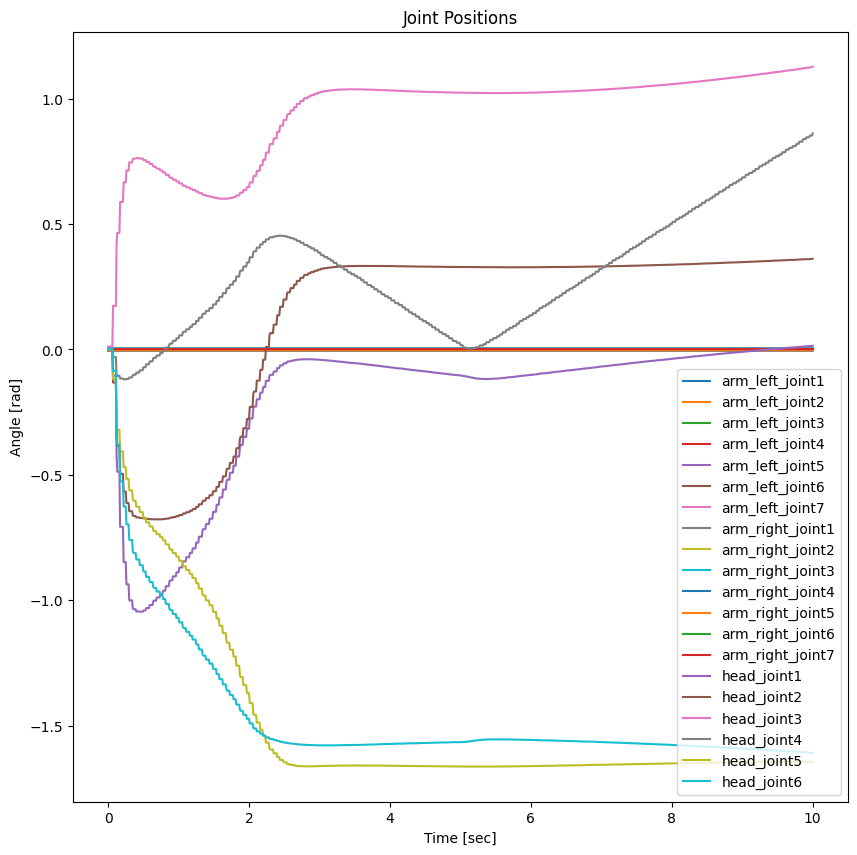

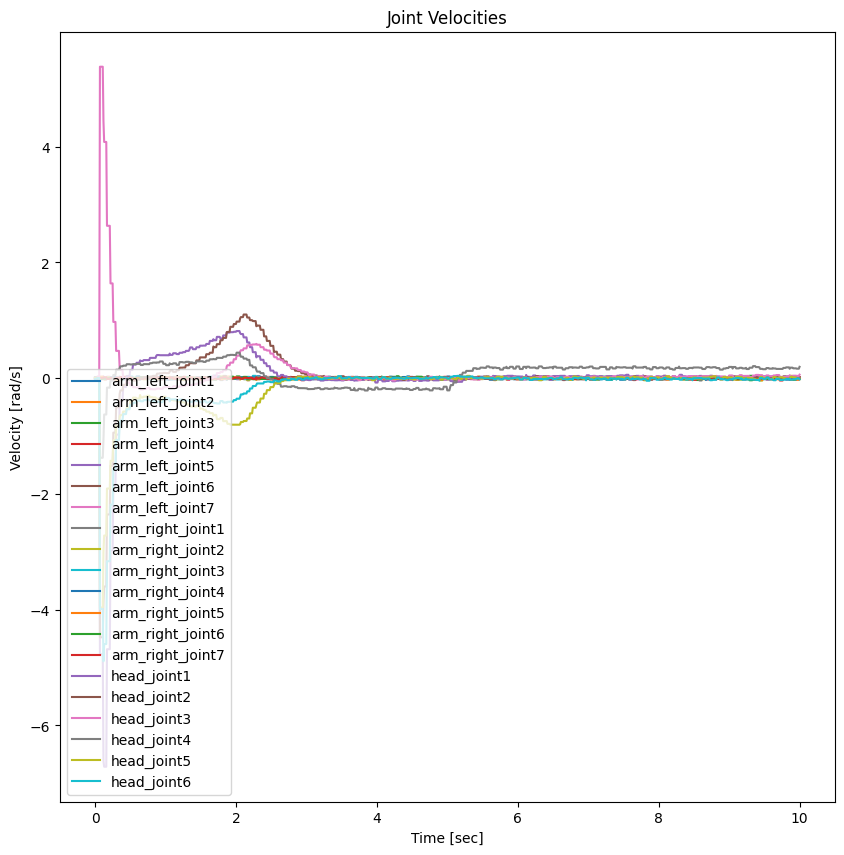

In [35]:
joint_positions = []
joint_velocities = []
time = []
joint_names = None
for d in experiments["test-collision_ik"]["data"]:
    joint_positions.append(d["joint_positions"])
    joint_velocities.append(d["joint_velocities"])
    time.append(d["time"])
    joint_names = d["joint_names"]
joint_positions = np.array(joint_positions)
joint_velocities = np.array(joint_velocities)
print("shape:", joint_positions.shape)

plt.subplots(figsize=(10,10))
plt.title("Joint Positions")
plt.xlabel("Time [sec]")
plt.ylabel("Angle [rad]")
plt.plot(time, joint_positions, label=joint_names)
plt.legend()
plt.show()

plt.subplots(figsize=(10,10))
plt.title("Joint Velocities")
plt.xlabel("Time [sec]")
plt.ylabel("Velocity [rad/s]")
plt.plot(time, joint_velocities, label=joint_names)
plt.legend()
plt.show()

In [27]:
num_collisions = 0
for d in experiments["test-collision_ik"]["data"]:
    num_collisions += int(d["collision_state"])
print("Total collision states:", num_collisions)

Total collision states: 0


In [ ]:
TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO 
TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO 
TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO 
TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO 
TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO 
TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO 

for m_type in samples_t.keys():
    fig, ax = plt.subplots(1, figsize=(7,5))
    for i, e_type in enumerate( sorted(samples_t[m_type].keys()) ):
        s = samples_t[m_type][e_type]
        timestamp, test_tra, test_rot, gt_tra, gt_rot = separate_data(s["data"])
        traj_err = np.linalg.norm(test_tra - gt_tra, axis=1)
        ax.plot(timestamp, traj_err, label=e_type)
    ax.set_ylabel("Endpoint translation error")
    ax.set_xlabel("Time [seconds]")
    ax.grid()
    ax.legend()
    fig.suptitle(m_type)
    fig.tight_layout()
    plt.plot()